# Outliers
akash patil aakashgolu1008@gmail.com

## Discussion Related With Outliers And Impact On Machine Learning!!


***which machine learning algorithum models are Sensitive to outliers?***

1. Naive Bayes Classifier: --------------Not sensitive to outliers.
2. SVM (Support Vector Machines):--------Not sensitive to outliers.
3. Decision Tree (Regressor/Classifier):-Not sensitive to outliers.
4. Random Forest (Ensemble):-------------Not sensitive to outliers.
5. XGBoost (Ensemble):-------------------Not sensitive to outliers.
6. Gradient Boosting (Ensemble):---------Not sensitive to outliers.
7. K-Nearest Neighbors (KNN):------------Not sensitive to outliers.
8. DBSCAN (Density-Based Spatial Clustering 
   of Applications with Noise):----------Sensitive to outliers.
9. Hierarchical Clustering:--------------Sensitive to outliers.
10. Linear Regression:-------------------Sensitive to outliers.
11. Logistic Regression:-----------------Sensitive to outliers.
12. K-Means Clustering:------------------Sensitive to outliers.
13. Principal Component Analysis (PCA):--Sensitive to outliers (very sensitive).
14. Neural Networks:---------------------Sensitive to outliers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\Guru\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Guru\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Guru\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
df=pd.read_csv('Titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df['age'].isnull().sum()

177

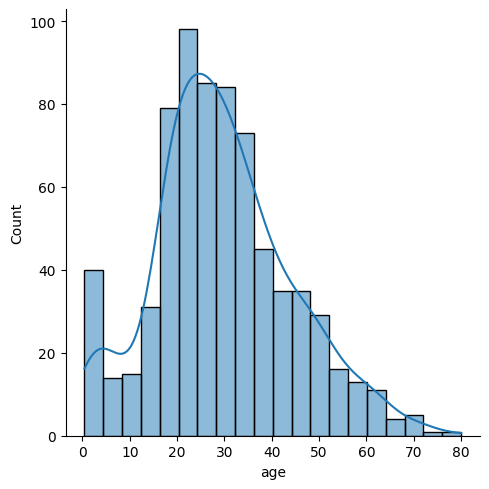

In [7]:
sns.displot(df['age'].dropna(),kde=True)

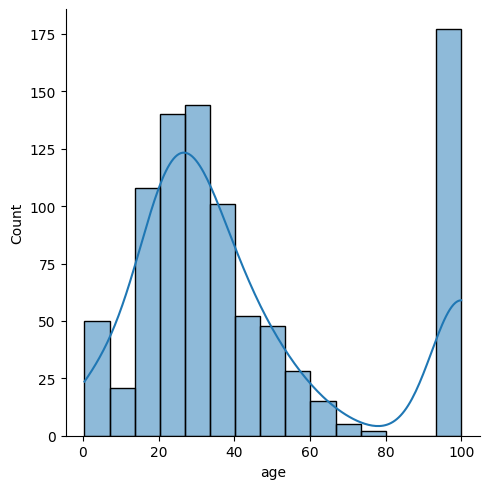

In [9]:
sns.displot(df['age'].fillna(100),kde=True) # we add 100 and here is the 100 is outlier

- ***age is normal distrubition/Gaussian Distributed(look like) hence we use 3 standerd deviation***

Text(0, 0.5, 'No. of passanger')

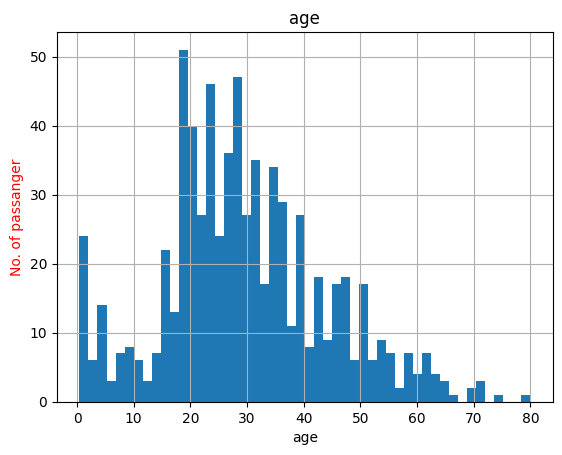

In [12]:
fig=df.age.hist(bins=50)
fig.set_title('age')
fig.set_xlabel('age')
fig.set_ylabel('No. of passanger',color='r')

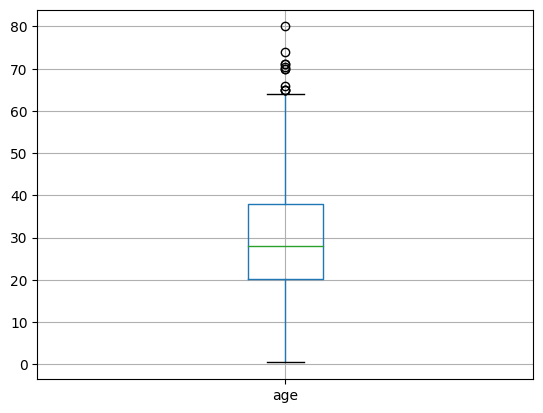

In [13]:
fig=df.boxplot(column='age')

In [15]:
df.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

- ***If The Data Is Normally Distributed We use this***

In [35]:
#### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
### use this std devi method for Gaussian Distribution  
#### after 3sd everything is outlier
upper_boundary=df["age"].mean()+3*df['age'].std()  #mean+3sigma
lower_boundary=df["age"].mean()-3*df["age"].std()  #mean-3sigma
print(upper_boundary),print(lower_boundary),print(df['age'].mean())

73.27860964406094
-13.880374349943303
29.69911764705882


(None, None, None)

- ***If Features Are Skewed We Use the below Technique***

Text(0, 0.5, 'No of passenger')

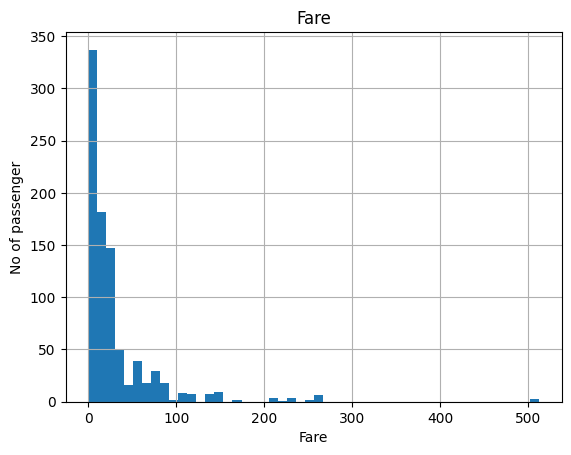

In [29]:
figure=df.fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

<AxesSubplot: >

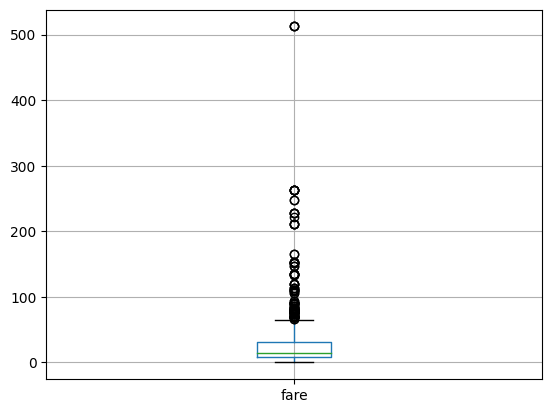

In [30]:
df.boxplot(column="fare")

In [31]:
df.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [32]:
#### compute the inter quartile range (IQR) to calculate the voundaries
IQR=df.fare.quantile(0.75)-df.fare.quantile(0.25)
IQR

23.0896

In [33]:
lower_bridge=df['fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge),print(upper_bridge)

-26.724
65.6344


(None, None)

In [34]:
#extreme outliers
lower_bridge=df['fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['fare'].quantile(0.75)+(IQR*3)
print(lower_bridge),print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

***if the data is right or left skweed then use the extreme outliers method***

In [38]:
data=df.copy()

In [43]:
data.loc[data['age']>=73,'age']=73  # In location age is greater then 73 w.r.t age fill 73
# if the data is very low then replae the outlirs

In [46]:
data.loc[data['fare']>=100,'fare']=100

Text(0, 0.5, 'No of passenger')

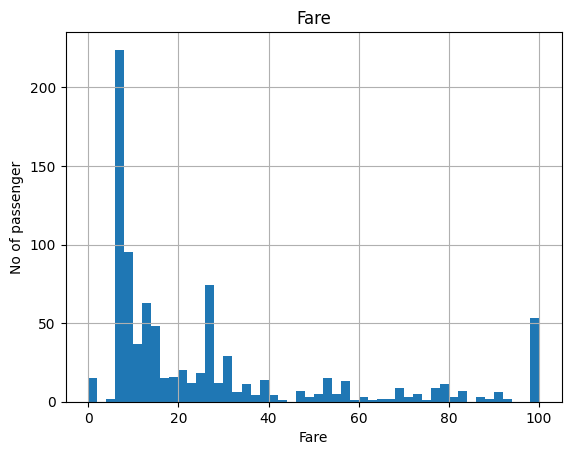

In [49]:
figure=data.fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No. of passanger')

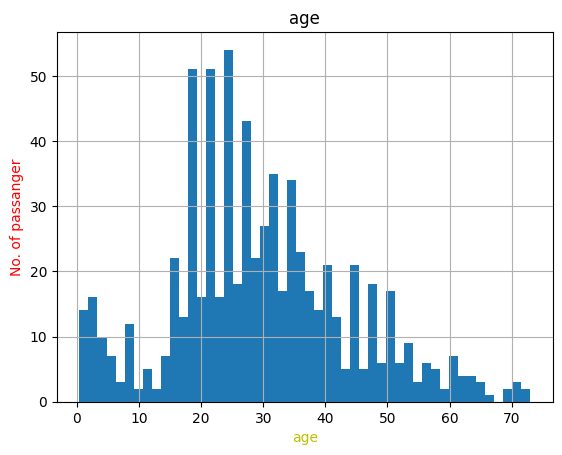

In [52]:
fig=data.age.hist(bins=50)
fig.set_title('age')
fig.set_xlabel('age',color='y')
fig.set_ylabel('No. of passanger',color='r')

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['age','fare']].fillna(0),data['survived'],test_size=0.3)

In [54]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.7350746268656716
roc_auc_score: 0.765186074429772


In [58]:
###RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6753731343283582
roc_auc_score: 0.7258703481392557
